# Possible Dependencies

In [1]:
# !pip install -q Cython -U
# !pip install -q scikit-tda -U

# !pip install numpy
# !pip install matplotlib
# !pip install sklearn

# Import Necessary Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.io as sio
import os
import utils
from ripser import ripser
from scipy import sparse
from persim import plot_diagrams
from persim import PersImage
from utils import *

# Display Time Series Signals

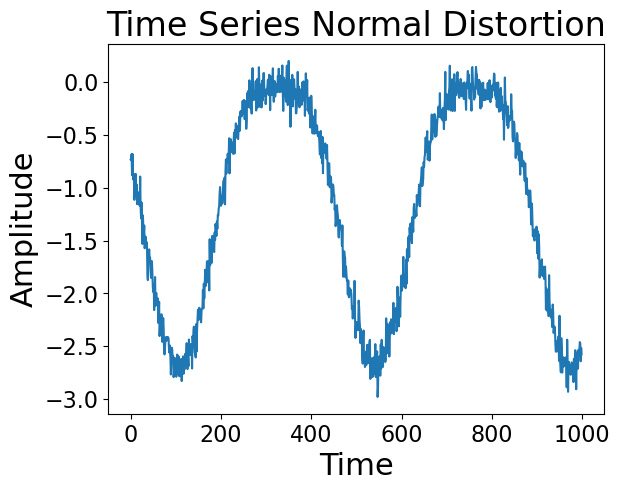

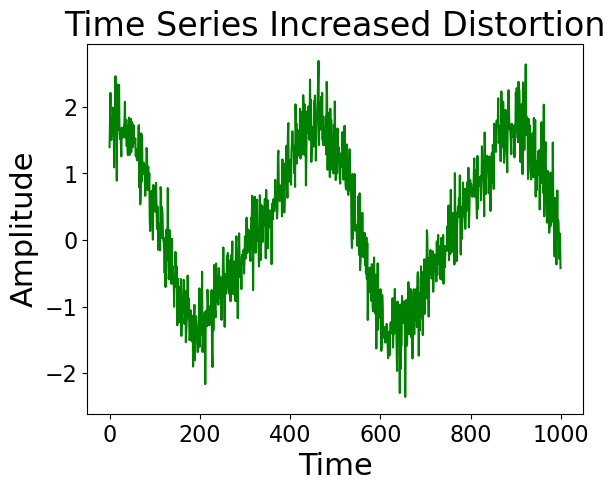

In [21]:

#Import Time Series Signals
###############################

time_series_normal = sio.loadmat("Dummy_Dataset/Normal_Distortion/normal_sample_5")
time_series_increased = sio.loadmat("Dummy_Dataset/Increased_Distortion/increased_sample_1")

x_normal = time_series_normal['x'][0]
x_increased = time_series_increased['x'][0] 


#Extra Information
###################################
    #print(np.shape(x_normal))
    #print(np.shape(x_increased))

    #print(x_normal)
    #print(x_increased)
    
    
#Plot Figures
###################################

plt.figure(1)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Amplitude', fontsize = 22)
plt.title('Time Series Normal Distortion', fontsize = 24)
plt.tick_params(axis = 'both', labelsize = 16)
plt.plot(x_normal)

plt.figure(2)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Amplitude', fontsize = 22)
plt.title('Time Series Increased Distortion', fontsize = 24)
plt.tick_params(axis = 'both', labelsize = 16)
plt.plot(x_increased, 'g')


# Normalize Time Series Signals (Zero-Center)

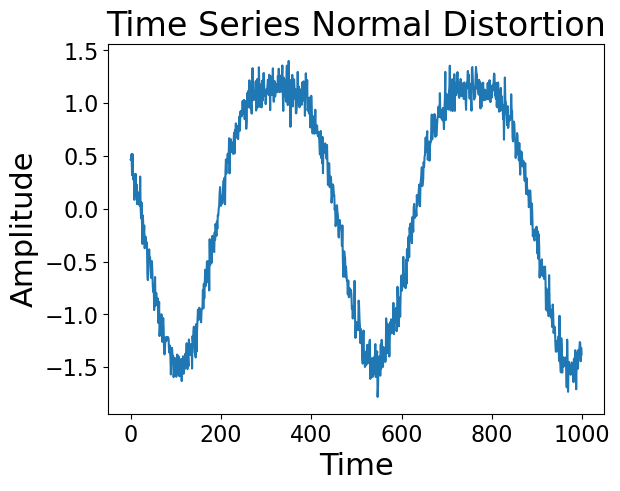

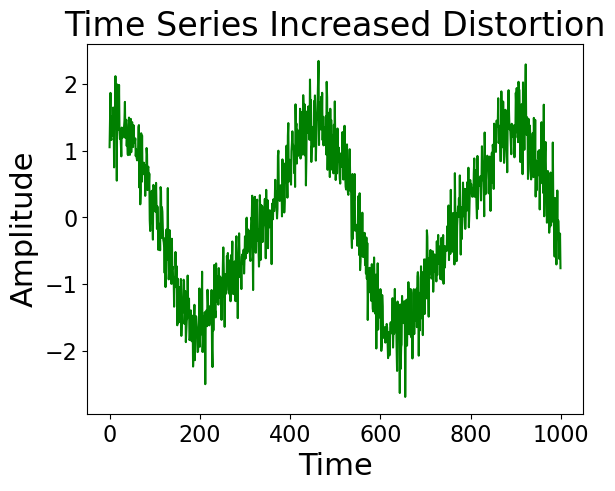

In [22]:
# Computing Mean of Each Signal
#####################################
mean_normal = np.mean(x_normal)
mean_increased = np.mean(x_increased)

#print(mean_normal)
#print(mean_increased)


# Normalizing Signal
#####################################

x_normal = x_normal - mean_normal
x_increased = x_increased - mean_increased

#Plot Figures
#####################################

plt.figure(1)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Amplitude', fontsize = 22)
plt.title('Time Series Normal Distortion', fontsize = 24)
plt.tick_params(axis = 'both', labelsize = 16)
plt.plot(x_normal)

plt.figure(2)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Amplitude', fontsize = 22)
plt.title('Time Series Increased Distortion', fontsize = 24)
plt.tick_params(axis = 'both', labelsize = 16)
plt.plot(x_increased, 'g')

## Normalizing all files

utils.mean_normalize("./Dummy_Dataset/")


# Range Enforcement (Keep signal between [-1, 1])

3.7103952779853833


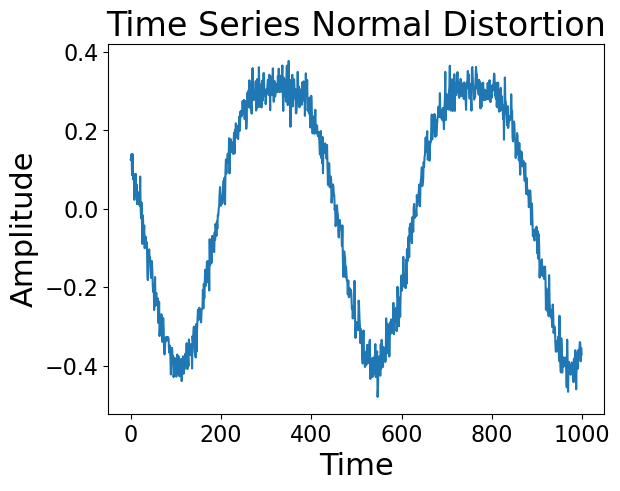

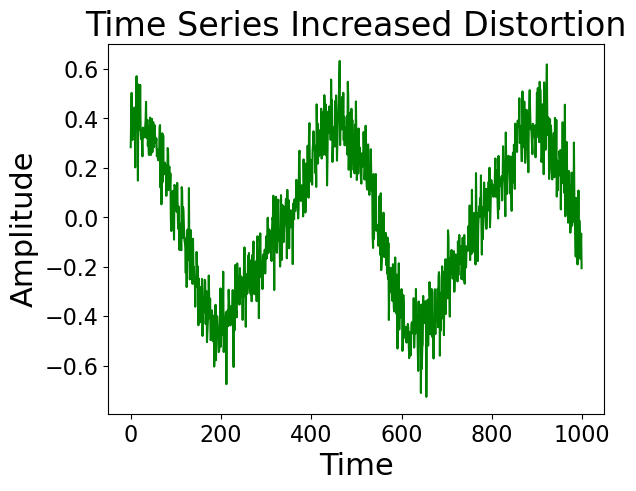

In [23]:
# Computing Maximum Magnitude Point Across All Samples
##########################################################

max_magnitude = -1

file_directory =  "./Mean_Normalized_Signals/"

max_magnitude = find_max_magnitude(file_directory)

print(max_magnitude)


# Range EnforcingTwo Samples in Example (Refer to Python Script for Full Range Enforcement of All Samples)
##########################################################

x_normal = x_normal/max_magnitude
x_increased = x_increased/max_magnitude

# Plot Diagrams
##########################################################
plt.figure(1)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Amplitude', fontsize = 22)
plt.title('Time Series Normal Distortion', fontsize = 24)
plt.tick_params(axis = 'both', labelsize = 16)
plt.plot(x_normal)

plt.figure(2)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Amplitude', fontsize = 22)
plt.title('Time Series Increased Distortion', fontsize = 24)
plt.tick_params(axis = 'both', labelsize = 16)
plt.plot(x_increased, 'g')  


# Persistence Diagram Creation

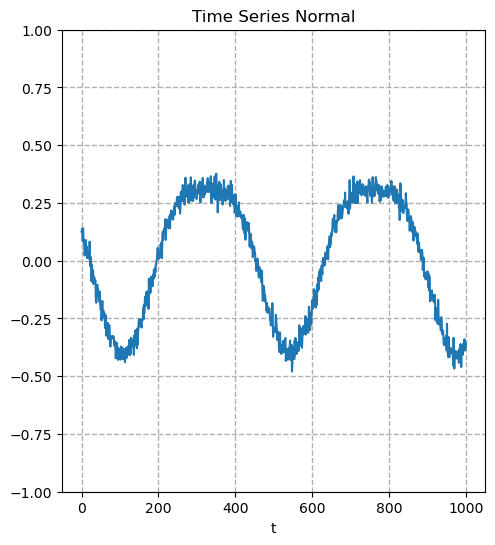

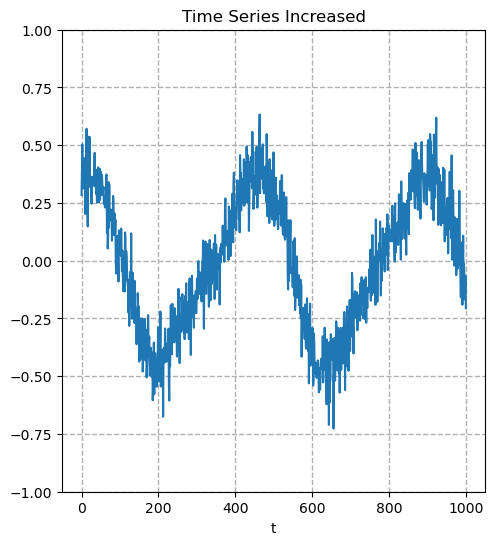

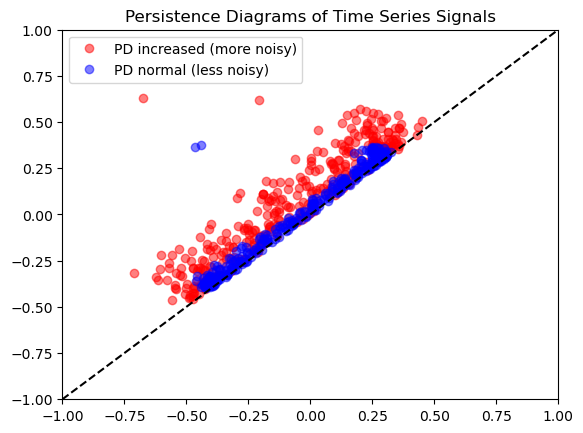

In [24]:

# Compute Persistence Diagram
###################################################

dgm0 = utils.generate_persistence_diagram(x_normal)
dgm0_i = utils.generate_persistence_diagram(x_increased)


# Removing Infinity Points
##################################################
where_are_inf = np.isinf(dgm0)
dgm0 = dgm0[~where_are_inf[:,1]]

where_are_inf_i = np.isinf(dgm0_i)
dgm0_i = dgm0_i[~where_are_inf_i[:,1]]



#Plot the time series and the persistence diagram
##################################################
N = len(x_normal)
t = np.arange(N)

N_i = len(x_increased)
t_i = np.arange(N_i)

plt.figure(figsize=(12, 6))
ylims = [-1, 1]
plt.subplot(121)
plt.plot(t, x_normal)
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("Time Series Normal")
plt.xlabel("t")
#plt.subplot(122)
#plt.ylim(ylims)
#plt.grid(linewidth=1, linestyle='--')
#plot_diagrams(dgm0, size=50)
#plt.title("Persistence Diagram Normal")
plt.show()

plt.figure(2, figsize=(12,6))
ylims = [-1, 1]
plt.subplot(121)
plt.plot(t_i, x_increased)
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("Time Series Increased")
plt.xlabel("t")
#plt.subplot(122)
#plt.ylim(ylims)
#plt.grid(linewidth=1, linestyle='--')
#plot_diagrams(dgm0_i, size=50)
#plt.title("Persistence Diagram Increased")
plt.show()

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Persistence Diagrams of Time Series Signals")
plt.plot(dgm0_i[:,0],dgm0_i[:,1],'ro', alpha=0.5, label="PD increased (more noisy)")
plt.plot(dgm0[:,0],dgm0[:,1],'bo', alpha=0.5, label="PD normal (less noisy)")
plt.legend()
plt.plot([-1,1],[-1,1],'k--')
plt.show()

# Persistence Image Creation

Length of PD: 316 points
Length Reduced PD: 36 points
Length of PD: 325 points
Length Reduced PD: 218 points


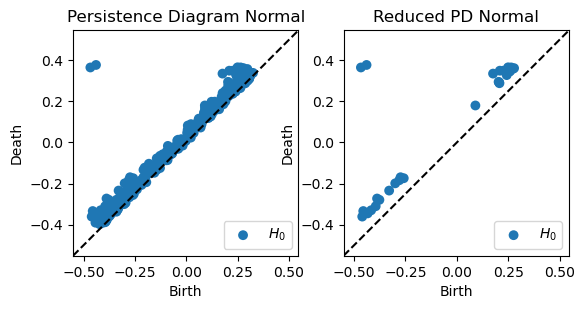

###############################
Length of PD Normal: 316 points
Length Reduced PD Normal: 36 points
Length of PD Increased: 325 points
Length Reduced PD Increased: 218 points
###############################
Length of PD: 316 points
Length Reduced PD: 36 points
PersImage(pixels=[100, 100], spread=0.015, specs={'minBD': -0.7, 'maxBD': 0.7}, kernel_type="gaussian", weighting_type="linear")
Persistence Image Normal


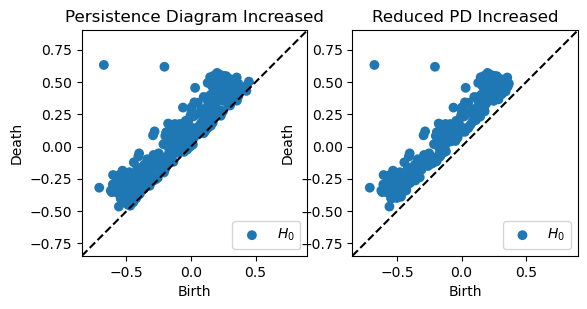

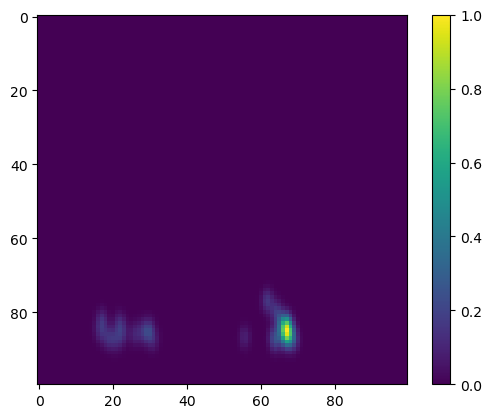

(100, 100)
Length of PD: 325 points
Length Reduced PD: 218 points
PersImage(pixels=[100, 100], spread=0.015, specs={'minBD': -0.7, 'maxBD': 0.7}, kernel_type="gaussian", weighting_type="linear")
Persistence Image Increased


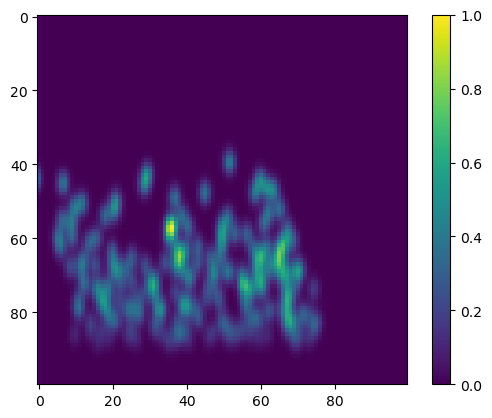

Try different variations of the parameters to get a feel for Persistence Images


In [20]:
#Setting Persistence Image Parameters (Subject to User Tuning)
############################################################
reduction = 0.08
pixel = 100
spreadval = 0.015
rangemin = -0.7
rangemax = 0.7


# Reducing Persistence Diagram (Thresholding with only points above reduction value given)
####################################################################################
reduced_pd_normal = utils.reduce_persistence_diagram(dgm0, reduction)
reduced_pd_increased = utils.reduce_persistence_diagram(dgm0_i, reduction)



# Plotting PDs for Comparison
#############################
plt.figure(1)
plt.subplot(121)

plot_diagrams(dgm0, size=50)
plt.title("Persistence Diagram Normal")

plt.subplot(122)
plot_diagrams(reduced_pd_normal, size=50)
plt.title("Reduced PD Normal")

plt.show()

print("###############################")

print("Length of PD Normal: " + str(len(dgm0)) + " points")
print("Length Reduced PD Normal: " + str(len(reduced_pd_normal)) + " points")


plt.figure(2)
plt.subplot(121)

plot_diagrams(dgm0_i, size=50)
plt.title("Persistence Diagram Increased")

plt.subplot(122)
plot_diagrams(reduced_pd_increased, size=50)
plt.title("Reduced PD Increased")

print("Length of PD Increased: " + str(len(dgm0_i)) + " points")
print("Length Reduced PD Increased: " + str(len(reduced_pd_increased)) + " points")


print("###############################")


#########################################################################

##Persistence Image
#############################
imgs = utils.generate_persistence_image(dgm0, reduction, pixel, spreadval, rangemin, rangemax)
print("Persistence Image Normal")
plt.figure()
plt.imshow(imgs)
plt.colorbar()
plt.show()

print(np.shape(imgs))

imgs_i = utils.generate_persistence_image(dgm0_i, reduction, pixel, spreadval, rangemin, rangemax)
print("Persistence Image Increased")

plt.figure()
plt.imshow(imgs_i)
plt.colorbar()
plt.show()

print("Try different variations of the parameters to get a feel for Persistence Images")



# Machine Learning

If you would like to understand how the SVM portion of the code works, please refer to the python file sublevel_set_TDA.py.
We have utilized a leave one subject out classification

# Additional Example

The following example highlights many different kinds of peak to trough matchings that are possible. Feel free to try matching yourself.

## Display Signal

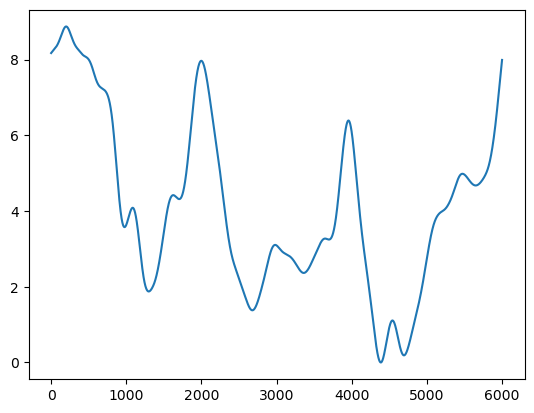

In [8]:
sample_signal = np.squeeze(np.transpose(sio.loadmat('sample_signal.mat')['signal']))
plt.plot(sample_signal)

## Persistence Diagram

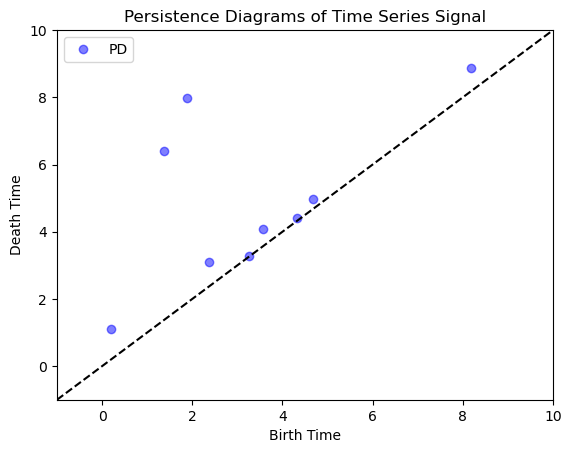

In [9]:
dgm0 = utils.generate_persistence_diagram(sample_signal)

# Removing Infinity Points
##################################################
where_are_inf = np.isinf(dgm0)
dgm0 = dgm0[~where_are_inf[:,1]]

plt.xlim(-1,10)
plt.ylim(-1,10)
plt.xlabel("Birth Time")
plt.ylabel("Death Time")
plt.title("Persistence Diagrams of Time Series Signal")
plt.plot(dgm0[:,0],dgm0[:,1],'bo', alpha=0.5, label="PD")
plt.legend()
plt.plot([-1,10],[-1,10],'k--')
plt.show()

## Signal and Persistence Diagram Colorized

(-0.5, 639.5, 479.5, -0.5)

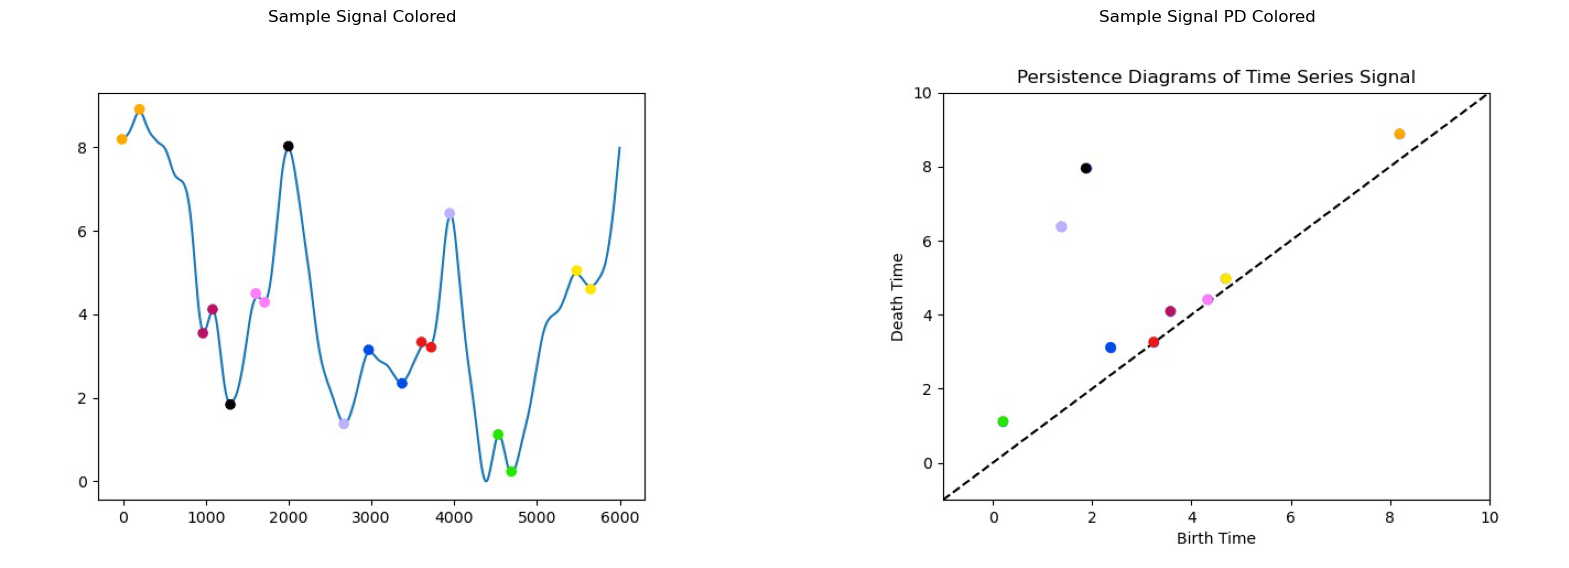

In [10]:
plt.figure(figsize=(20,20))

sample_signal_colored = img.imread('sample_signal_colored.jpg')
plt.subplot(221)
plt.imshow(sample_signal_colored)
plt.title('Sample Signal Colored')
plt.axis('off')

plt.subplot(222)
sample_signal_PD_colored = img.imread('sample_signal_PD_colored.jpg')
plt.imshow(sample_signal_PD_colored)
plt.title('Sample Signal PD Colored')
plt.axis('off')

## Persistence Images

Length of PD: 9 points
Length Reduced PD: 9 points
PersImage(pixels=[100, 100], spread=0.25, specs={'minBD': -10, 'maxBD': 10}, kernel_type="gaussian", weighting_type="linear")
Persistence Image Sample Signal


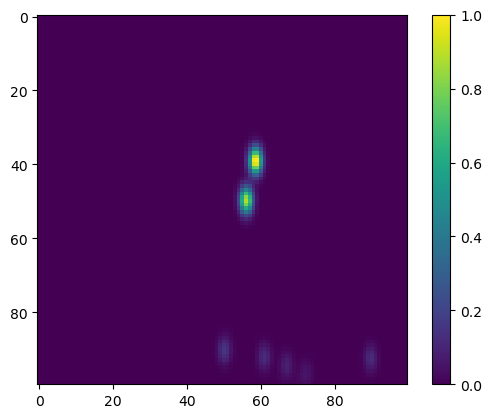

In [11]:
imgs = utils.generate_persistence_image(dgm0, 0, pixel, 0.25, -10, 10)
print("Persistence Image Sample Signal")
plt.figure()
plt.imshow(imgs)
plt.colorbar()
plt.show()